# Obtenir des données par bassin versant
### Vue d'ensemble

L'objectif c'est d'extraire la série temporelle associée à des bassins versants pour chaque projection CORDEX.  
Por le faire, il faut travailler avec:
- La forme de chaque bassin versant (format .kml (Google Earth), avec information sur le code du bassin).
- Le nom de la colonne d'information dans le fichier .kml (pour nous, "Indice").
- Les données de base CORDEX (région du Maroc, pas de temps mensuel, format .mr (MeteoRaster)).

### L'intérieur du fichier KML
Avec le code suivant, nous pouvons voir les premières lignes du ficheir `catchments.kml`.

Voir `"Indice"` dans les champs `\<SimpleData\>`.

In [1]:
import pandas as pd
from pathlib import Path

kml = Path(r'data/catchments.kml')

with open(kml, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        print(line.rstrip())
        if i >= 73:
            break

<?xml version="1.0" encoding="UTF-8"?>
<kml>
<Document id="simplified">
	<name>simplified</name>
	<open>1</open>
	<Schema name="C:/Users/zepedro/Dropbox/01.WorkInProgress/Stucky/Projects/Maroc/catchments.kml" id="simplified.schema">
		<SimpleField type="string" name="LAYER"></SimpleField>
		<SimpleField type="string" name="PERIMETER"></SimpleField>
		<SimpleField type="string" name="ENCLOSED_A"></SimpleField>
		<SimpleField type="string" name="Point"></SimpleField>
		<SimpleField type="string" name="Indice"></SimpleField>
		<SimpleField type="string" name="Oued"></SimpleField>
		<SimpleField type="float" name="Area km2"></SimpleField>
	</Schema>
	<StyleMap id="m_ylw-pushpin">
		<Pair>
			<key>normal</key>
			<styleUrl>#s_ylw-pushpin</styleUrl>
		</Pair>
		<Pair>
			<key>highlight</key>
			<styleUrl>#s_ylw-pushpin_hl</styleUrl>
		</Pair>
	</StyleMap>
	<Style id="s_ylw-pushpin">
		<IconStyle>
			<scale>1.1</scale>
			<Icon>
				<href>http://maps.google.com/mapfiles/kml/pushpin/ylw-pushpi

### Charger les données avec MeteoRaster
Il est à nouveau nécéssaire charger les données...

In [2]:
from meteoraster import MeteoRaster

data_path = Path(r'data/tas_MOROCCO_CSIRO-QCCCE-CSIRO-Mk3-6-0_rcp85_r1i1p1_SMHI-RCA4_v1_mon_20060101-21001231.mr')
data = MeteoRaster.load(data_path)

ModuleNotFoundError: No module named 'meteoraster'

### Extraire de l'information par bassin versant
Cela peut être fait avec l'aide de la fonction `getValuesFromKML`. Il faut indiquer:
- le fichier `kml`.
- le "champ" indicant le nom du bassin versant, avec `nameField`.  

In [23]:
values, centroids, coverage_info = data.getValuesFromKML(kml, nameField='Indice', getCoverageInfo=True)
values

    Creating a coverage matrix for spatial aggregation...
        Level Leadtime is redundant and will be dropped.
        Level Ensemble member is redundant and will be dropped.
        Done.
    Executing spatial aggregation...
        Done.


Zone,Q15a,Q15b,Q16,Q17,Q18,Q19,Q20,Q21,Q14b,Q14a,...,Q7,Q6,Q5,Q4b,Q4a,Q3,Q1,Q2,Q22,Q23
Production date,,,,,,,,,,,,,,,,,,,,,
2006-01-01,8.908210,10.610022,12.041199,12.085167,12.838396,10.471654,9.721931,10.588695,11.056437,11.032490,...,7.906811,10.878007,9.797359,7.885380,5.939059,10.151764,10.017122,9.838288,10.588695,10.545672
2006-02-01,10.172211,11.785679,13.204558,13.251974,13.965070,11.834677,11.070442,11.953982,12.142599,12.121613,...,8.566018,11.800005,10.644741,8.699254,6.622509,11.112316,10.900970,10.750863,11.953982,11.910127
2006-03-01,10.317734,11.751245,13.090192,13.136509,13.830517,11.936929,11.168610,12.056872,12.052839,12.034225,...,8.671180,11.556684,10.591964,9.030489,6.953634,11.026901,10.845682,10.725966,12.056872,12.012782
2006-04-01,13.640360,14.501884,15.366967,15.396574,15.806731,14.719000,14.155359,14.806991,14.703866,14.691630,...,12.640857,14.514664,13.820905,13.019682,11.350225,14.134934,13.959074,13.897248,14.806991,14.774646
2006-05-01,17.647614,18.201635,18.671509,18.683594,18.403152,18.518904,17.993450,18.600933,18.400835,18.390934,...,16.706697,18.272011,17.726221,17.406284,15.781434,18.027189,17.881178,17.853239,18.600933,18.570780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-08-01,29.744682,28.323965,27.141075,27.100491,25.810362,28.494297,28.976364,28.419041,28.050089,28.066809,...,30.306767,28.516239,29.271656,30.973438,30.848164,29.036322,29.131741,29.277365,28.419041,28.446703
2100-09-01,30.363064,29.910131,29.287094,29.258623,28.229946,29.965717,30.067905,29.949764,29.924765,29.927965,...,30.317972,30.413496,30.450710,30.972498,29.797659,30.441095,30.444555,30.474787,29.949764,29.955627
2100-10-01,23.423950,23.836559,24.274502,24.288527,24.095694,24.105188,23.699192,24.168568,23.960402,23.953444,...,22.608885,23.852180,23.449074,23.256880,21.944233,23.680265,23.575321,23.555559,24.168568,24.145269


### Les objets "Pandas DataFrame"
La variable produite par la fonction antérieure est du type Pandas DataFrame.  
Pandas permet de manipuler facilement de l'information tabulaire.  
C'est un peu comme l'Excel de Python.

In [26]:
# Confirmer le type de l'objet "values"
print(type(values))

# Aligner les colonnes par ordre alphabétique
values.sort_index(axis=1)

<class 'pandas.core.frame.DataFrame'>


Zone,Q1,Q10,Q11a,Q11b,Q12,Q13,Q14a,Q14b,Q15a,Q15b,...,Q23,Q3,Q4a,Q4b,Q5,Q6,Q7,Q8a,Q8b,Q9
Production date,,,,,,,,,,,,,,,,,,,,,
2006-01-01,10.017122,12.019640,11.881348,11.783116,11.357737,11.470825,11.032490,11.056437,8.908210,10.610022,...,10.545672,10.151764,5.939059,7.885380,9.797359,10.878007,7.906811,8.498070,10.485038,11.578111
2006-02-01,10.900970,12.996836,12.900043,12.832837,12.428789,12.536207,12.121613,12.142599,10.172211,11.785679,...,11.910127,11.112316,6.622509,8.699254,10.644741,11.800005,8.566018,9.142721,11.263159,12.532107
2006-03-01,10.845682,12.597370,12.619533,12.595198,12.277716,12.362119,12.034225,12.052839,10.317734,11.751245,...,12.012782,11.026901,6.953634,9.030489,10.591964,11.556684,8.671180,9.115833,11.021390,12.137517
2006-04-01,13.959074,15.196717,15.110710,15.078465,14.859184,14.917480,14.691630,14.703866,13.640360,14.501884,...,14.774646,14.134934,11.350225,13.019682,13.820905,14.514664,12.640857,12.927469,14.388403,14.966366
2006-05-01,17.881178,18.526104,18.384428,18.418276,18.408066,18.410778,18.390934,18.400835,17.647614,18.201635,...,18.570780,18.027189,15.781434,17.406284,17.726221,18.272011,16.706697,16.797489,18.315241,18.591860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100-08-01,29.131741,27.362217,27.242071,27.319166,27.747028,27.633278,28.066809,28.050089,29.744682,28.323965,...,28.446703,29.036322,30.848164,30.973438,29.271656,28.516239,30.306767,29.932400,29.208385,28.016317
2100-09-01,30.444555,29.855427,29.536638,29.558937,29.773081,29.716148,29.927965,29.924765,30.363064,29.910131,...,29.955627,30.441095,29.797659,30.972498,30.450710,30.413496,30.317972,30.256533,30.897718,30.388306
2100-10-01,23.575321,24.109753,24.040960,24.049263,23.997244,24.011072,23.953444,23.960402,23.423950,23.836559,...,24.145269,23.680265,21.944233,23.256880,23.449074,23.852180,22.608885,22.627483,23.768595,24.079353


### Plus sur "Pandas"
Pandas est une manière pratique de sélectionner des données et de les visualiser (nous l'avons utilisé avant précisément pour générer des graphiques).

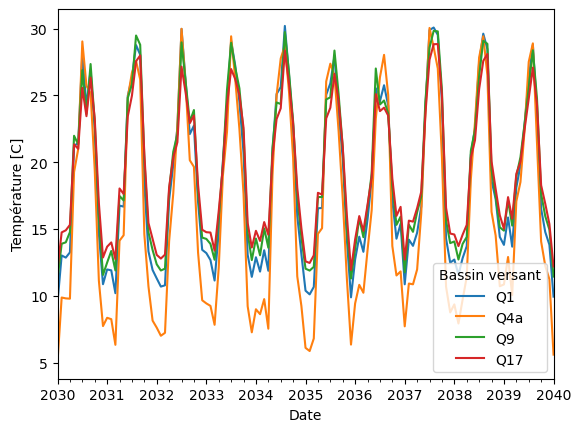

In [37]:
values.columns.name = 'Bassin versant'
ax = values.loc['2030-01-01': '2040-01-01', ['Q1', 'Q4a', 'Q9', 'Q17']].plot()
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Température [C]')

### Encore plus sur "Pandas"
Le module Pandas est aussi très utile pour importer et exporter des données.  

Ici, nous allons saufgarder la matrice sur les formats `.xlsx` (Excel) et `.csv` (Comma Separated Values) 

In [40]:
# Sauvegarde sur .xlsx dans le dossier "temp"
values.to_excel(Path(r'temp/values.xlsx'))
# Sauvegarde sur .csv dans le dossier "temp"
values.to_csv(Path(r'temp/values.csv'))

In [42]:
# Confirmer que le fichier .csv a été écrit...
with open(Path(r'temp/values.csv'), 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        print(line.rstrip())
        if i >= 10:
            break

Production date,Q15a,Q15b,Q16,Q17,Q18,Q19,Q20,Q21,Q14b,Q14a,Q13,Q12,Q11b,Q11a,Q10,Q9,Q8b,Q8a,Q7,Q6,Q5,Q4b,Q4a,Q3,Q1,Q2,Q22,Q23
2006-01-01,8.90821,10.610022,12.041199,12.085167,12.838396,10.471654,9.7219305,10.588695,11.056437,11.03249,11.470825,11.357737,11.783116,11.881348,12.01964,11.578111,10.485038,8.49807,7.906811,10.878007,9.7973585,7.8853803,5.939059,10.151764,10.017122,9.838288,10.588695,10.545672
2006-02-01,10.172211,11.785679,13.204558,13.251974,13.96507,11.834677,11.070442,11.953982,12.142599,12.121613,12.536207,12.428789,12.832837,12.9000435,12.996836,12.532107,11.263159,9.142721,8.566018,11.800005,10.644741,8.699254,6.622509,11.112316,10.9009695,10.750863,11.953982,11.910127
2006-03-01,10.317734,11.7512455,13.090192,13.136509,13.830517,11.936929,11.16861,12.056872,12.052839,12.034225,12.362119,12.277716,12.595198,12.619533,12.59737,12.137517,11.02139,9.115833,8.67118,11.556684,10.591964,9.030489,6.9536343,11.026901,10.845682,10.725966,12.056872,12.012782
2006-04-01,13.6403

### Télécharger le fichier .xlsx
Cherchez le fichier `.xlsx` dans le dossier `temp` du projet et confirmez que tout est bien sur `Excel`